# Take Home Assignment

###Introduction and Dataset Description

Student performance dataset depicts student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features and it was collected by using school reports and questionnaires.
Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por).

Dataset available at: https://doi.org/10.24432/C5TG7T <br>
Domain: Education, student achievement prediction.<br>
Attributes: ~33 including student info (age, sex, family), social (activities, alcohol use), school support, etc.<br>
Target: G3 (final grade out of 20).

##Data Loading

In [1]:
#Import required libraries
import pandas as pd

#Load datasets
mat = pd.read_csv("/content/student-mat.csv", header=None)
por = pd.read_csv("/content/student-por.csv", header=None)

##Math report
#Split the single column into multiple columns
mat = mat[0].str.split(";", expand=True)

#Set the first row as header
mat.columns = mat.iloc[0]
mat_data = mat.drop(index=0).reset_index(drop=True)

##Portugees report
#Split the single column into multiple columns
por = por[0].str.split(";", expand=True)

#Set the first row as header
por.columns = por.iloc[0]
por_data = por.drop(index=0).reset_index(drop=True)

#Show basic info
print("Mathematics dataset shape:", mat_data.shape)
print("Portuguese dataset shape:", por_data.shape)

# Preview first rows
mat_data.head()

Mathematics dataset shape: (395, 33)
Portuguese dataset shape: (649, 33)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,"""F""",18,"""U""","""GT3""","""A""",4,4,"""at_home""","""teacher""",...,4,3,4,1,1,3,6,"""5""","""6""",6
1,GP,"""F""",17,"""U""","""GT3""","""T""",1,1,"""at_home""","""other""",...,5,3,3,1,1,3,4,"""5""","""5""",6
2,GP,"""F""",15,"""U""","""LE3""","""T""",1,1,"""at_home""","""other""",...,4,3,2,2,3,3,10,"""7""","""8""",10
3,GP,"""F""",15,"""U""","""GT3""","""T""",4,2,"""health""","""services""",...,3,2,2,1,1,5,2,"""15""","""14""",15
4,GP,"""F""",16,"""U""","""GT3""","""T""",3,3,"""other""","""other""",...,4,3,2,1,2,5,4,"""6""","""10""",10


In [2]:
por_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,"""F""",18,"""U""","""GT3""","""A""",4,4,"""at_home""","""teacher""",...,4,3,4,1,1,3,4,"""0""","""11""",11
1,GP,"""F""",17,"""U""","""GT3""","""T""",1,1,"""at_home""","""other""",...,5,3,3,1,1,3,2,"""9""","""11""",11
2,GP,"""F""",15,"""U""","""LE3""","""T""",1,1,"""at_home""","""other""",...,4,3,2,2,3,3,6,"""12""","""13""",12
3,GP,"""F""",15,"""U""","""GT3""","""T""",4,2,"""health""","""services""",...,3,2,2,1,1,5,0,"""14""","""14""",14
4,GP,"""F""",16,"""U""","""GT3""","""T""",3,3,"""other""","""other""",...,4,3,2,1,2,5,0,"""11""","""13""",13


In [3]:
#Columns we expect to be numeric but may have quotes
numeric_cols = ['G1', 'G2']

#Remove quotes and convert to numeric in Maths
for col in numeric_cols:
    mat_data[col] = (
        mat_data[col]
        .astype(str)
        .str.strip()
        .str.replace('"', '', regex=False)
    )
    mat_data[col] = pd.to_numeric(mat_data[col], errors='coerce')

#Remove quotes and convert to numeric in Portugees
for col in numeric_cols:
    por_data[col] = (
        por_data[col]
        .astype(str)
        .str.strip()
        .str.replace('"', '', regex=False)
    )
    por_data[col] = pd.to_numeric(por_data[col], errors='coerce')

In [4]:
#Convert columns to numeric
numeric_cols = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G3']
mat_data[numeric_cols] = mat_data[numeric_cols].apply(pd.to_numeric, errors='coerce')

#Convert colums to categorical
categorical_cols = ['school', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian']
mat_data[categorical_cols] = mat_data[categorical_cols].astype('category')

print(mat_data.dtypes)

0
school        category
sex             object
age              int64
address       category
famsize       category
Pstatus       category
Medu             int64
Fedu             int64
Mjob          category
Fjob          category
reason        category
guardian      category
traveltime       int64
studytime        int64
failures         int64
schoolsup       object
famsup          object
paid            object
activities      object
nursery         object
higher          object
internet        object
romantic        object
famrel           int64
freetime         int64
goout            int64
Dalc             int64
Walc             int64
health           int64
absences         int64
G1               int64
G2               int64
G3               int64
dtype: object


In [5]:
#Convert columns to numeric
numeric_cols = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G3']
por_data[numeric_cols] = por_data[numeric_cols].apply(pd.to_numeric, errors='coerce')

#Convert colums to categorical
categorical_cols = ['school', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian']
por_data[categorical_cols] = por_data[categorical_cols].astype('category')

print(por_data.dtypes)

0
school        category
sex             object
age              int64
address       category
famsize       category
Pstatus       category
Medu             int64
Fedu             int64
Mjob          category
Fjob          category
reason        category
guardian      category
traveltime       int64
studytime        int64
failures         int64
schoolsup       object
famsup          object
paid            object
activities      object
nursery         object
higher          object
internet        object
romantic        object
famrel           int64
freetime         int64
goout            int64
Dalc             int64
Walc             int64
health           int64
absences         int64
G1               int64
G2               int64
G3               int64
dtype: object


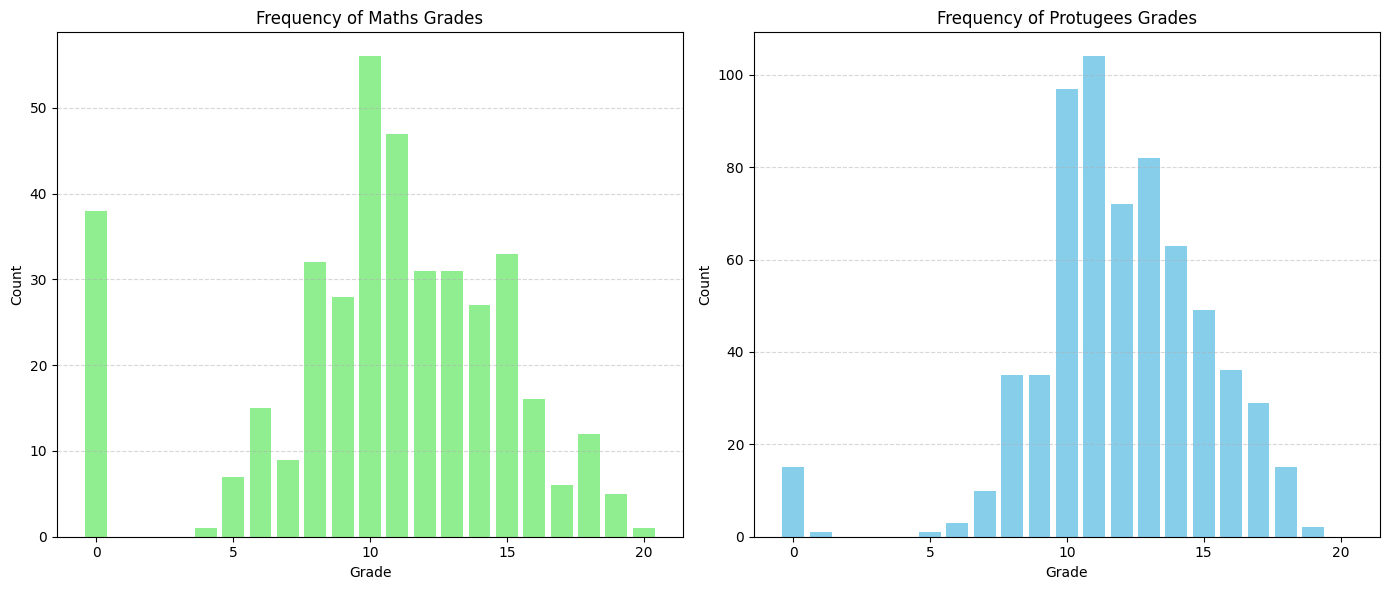

In [6]:
import matplotlib.pyplot as plt

# Count occurrences of each value
math_G3 = mat_data['G3'].value_counts().sort_index()
por_G3 = por_data['G3'].value_counts().sort_index()

# Ensure all values from 0 to 20 are represented
full_range = pd.Series(0, index=range(0, 21))
counts_complete1 = full_range.add(math_G3, fill_value=0).astype(int)
counts_complete2 = full_range.add(por_G3, fill_value=0).astype(int)

# Display the result
# print(counts_complete1)
# print(counts_complete2)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot Maths frequency
axes[0].bar(counts_complete1.index, counts_complete1.values, color='lightgreen')
axes[0].set_title('Frequency of Maths Grades')
axes[0].set_xlabel('Grade')
axes[0].set_ylabel('Count')
axes[0].grid(axis='y', linestyle='--', alpha=0.5)

# Plot G3 frequency
axes[1].bar(counts_complete2.index, counts_complete2.values, color='skyblue')
axes[1].set_title('Frequency of Protugees Grades')
axes[1].set_xlabel('Grade')
axes[1].set_ylabel('Count')
axes[1].grid(axis='y', linestyle='--', alpha=0.5)

# Adjust layout
plt.tight_layout()
plt.show()

Above true value graphs give clear overview of what the models should predict. It is very much like a Gausian distribution (Bell Shaped curve).

There are queit a lot of zeros. Need to do Feature Engineering.

## Data Preprocessing

First, check whether there are missing values.

In [7]:
#Check for missing values
print("Missing values in math dataset:\n", mat.isnull().sum().sum())
print("Missing values in por dataset:\n", por.isnull().sum().sum())

Missing values in math dataset:
 0
Missing values in por dataset:
 0


There were few issues like,<br> <ul> <li> Inconsistent missing value representations like "?", "N/A", "NA", "" and replaced them with NaN </li>
<li> Unnecessary Spaces and quotes and removed them </li>
<li> Incorrect data types and transform them into correct data type </li> </ul>
 in the data loading step directly.

Then, new combined dataset is created using two seperate Maths and Portuguese. For that Data Integration techniques were used.

In [9]:
#Load both datasets
d1 = pd.read_csv("/content/student-mat.csv", sep=";")
d2 = pd.read_csv("/content/student-por.csv", sep=";")

#Keys for merging
merge_keys = ["school","sex","age","address","famsize","Pstatus",
              "Medu","Fedu","Mjob","Fjob","reason","nursery","internet"]

#Merge with suffixes
d3 = pd.merge(d1, d2, on=merge_keys, suffixes=("_math", "_por"))

#Take non-grade features from the _math side (to avoid duplicates)
non_grade_features = [
    "guardian_math","traveltime_math","studytime_math","failures_math",
    "schoolsup_math","famsup_math","paid_math","activities_math",
    "higher_math","romantic_math","famrel_math","freetime_math",
    "goout_math","Dalc_math","Walc_math","health_math","absences_math"
]

#Keep merge keys + selected features + grade features
grade_features = ["G1_math", "G2_math", "G3_math",
                  "G1_por", "G2_por", "G3_por"]

final_df = d3[merge_keys + non_grade_features + grade_features]

#Rename the non-grade features back to original names (drop _math suffix)
final_df = final_df.rename(columns=lambda x: x.replace("_math", ""))

print("Number of merged students:", len(final_df))  # should be 382

#Save
final_df.to_csv("student-mat-por-merged.csv", index=False, sep=";")
print("Merged CSV saved as 'student-mat-por-merged.csv'")

Number of merged students: 0
Merged CSV saved as 'student-mat-por-merged.csv'


This task gives the Integrated Dataset with suitable Feature names.

### Exploratory Data Analysis

Encode the Nominal Categorical features to analyse the data set using One Hot Encoding. <br>
Encode the Ordinal Categorical features using Ordinal Encoder. <br>
Encode the Binary Categorical features (Ex: Sex) using Simple Mapping.

In [8]:
from sklearn.preprocessing import StandardScaler

#Define column groups
nominal_cols = ['school', 'address', 'Mjob', 'Fjob', 'reason', 'guardian']
ordinal_cols = ['Medu', 'Fedu']
numeric_cols = ['age', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']
binary_cols = ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
binary_string_cols = ['sex', 'famsize', 'Pstatus']

for col in binary_cols:
    mat_data[col] = (
        mat_data[col]
        .astype(str)
        .str.strip()
        .str.replace('"', '', regex=False)
        .map({'no': 0, 'yes': 1})
        .astype('Int64')
    )

#Encode binary categorical as 0/1 for mat_data
# mat_data['sex'] = mat_data['sex'].map({'F': 0, 'M': 1}).astype('Int64')
# mat_data['schoolsup'] = mat_data['schoolsup'].map({'no': 0, 'yes': 1}).astype('Int64')
# mat_data['famsup'] = mat_data['famsup'].map({'no': 0, 'yes': 1}).astype('Int64')
# mat_data['paid'] = mat_data['paid'].map({'no': 0, 'yes': 1}).astype('Int64')
# mat_data['activities'] = mat_data['activities'].map({'no': 0, 'yes': 1}).astype('Int64')
# mat_data['nursery'] = mat_data['nursery'].map({'no': 0, 'yes': 1}).astype('Int64')
# mat_data['higher'] = mat_data['higher'].map({'no': 0, 'yes': 1}).astype('Int64')
# mat_data['internet'] = mat_data['internet'].map({'no': 0, 'yes': 1}).astype('Int64')
# mat_data['romantic'] = mat_data['romantic'].map({'no': 0, 'yes': 1}).astype('Int64')
mat_data['sex'] = (
    mat_data['sex']
    .astype(str)
    .str.strip()
    .str.replace('"', '', regex=False)
    .map({'F': 0, 'M': 1})
    .astype('Int64')
)
mat_data['famsize_bin'] = (
    mat_data['famsize']
    .astype(str)
    .str.strip()
    .str.replace('"', '', regex=False)
    .map({'LE3': 0, 'GT3': 1})
    .astype('Int64')
)

mat_data['Pstatus_bin'] = (
    mat_data['Pstatus']
    .astype(str)
    .str.strip()
    .str.replace('"', '', regex=False)
    .map({'A': 0, 'T': 1})
    .astype('Int64')
)
mat_data['famsize'] = mat_data['famsize'].astype('category')
mat_data['Pstatus'] = mat_data['Pstatus'].astype('category')


#One-Hot Encode nominal categoricals - because categorical feature must be converted to numerical values before appling correlation
mat_data_encoded = pd.get_dummies(mat_data, columns=nominal_cols, drop_first=True)
# por_data_encoded = pd.get_dummies(por_data, columns=nominal_cols, drop_first=True)
#Scale numeric features
scaler = StandardScaler()
mat_data_encoded[numeric_cols] = scaler.fit_transform(mat_data_encoded[numeric_cols])
# por_data[numeric_cols] = scaler.fit_transform(por_data[numeric_cols])

mat_data_encoded.drop(columns=['famsize', 'Pstatus'], inplace=True)

#Check result
print(mat_data_encoded.head())
print(mat_data_encoded.dtypes)

   sex       age famsize Pstatus  Medu  Fedu  traveltime  studytime  failures  \
0    0  1.023046   "GT3"     "A"     4     4    0.792251  -0.042286 -0.449944   
1    0  0.238380   "GT3"     "T"     1     1   -0.643249  -0.042286 -0.449944   
2    0 -1.330954   "LE3"     "T"     1     1   -0.643249  -0.042286  3.589323   
3    0 -1.330954   "GT3"     "T"     4     2   -0.643249   1.150779 -0.449944   
4    0 -0.546287   "GT3"     "T"     3     3   -0.643249  -0.042286 -0.449944   

   schoolsup  ...  Mjob_"teacher"  Fjob_"health"  Fjob_"other"  \
0          1  ...           False          False         False   
1          0  ...           False          False          True   
2          1  ...           False          False          True   
3          0  ...           False          False         False   
4          0  ...           False          False          True   

   Fjob_"services"  Fjob_"teacher"  reason_"home"  reason_"other"  \
0            False            True          Fal

In [9]:
pd.set_option('display.max_columns', None)  # show all columns
pd.set_option('display.width', None)        # don't wrap lines
print(mat_data.head())

0 school  sex  age address famsize Pstatus  Medu  Fedu       Mjob        Fjob  \
0     GP    0   18     "U"   "GT3"     "A"     4     4  "at_home"   "teacher"   
1     GP    0   17     "U"   "GT3"     "T"     1     1  "at_home"     "other"   
2     GP    0   15     "U"   "LE3"     "T"     1     1  "at_home"     "other"   
3     GP    0   15     "U"   "GT3"     "T"     4     2   "health"  "services"   
4     GP    0   16     "U"   "GT3"     "T"     3     3    "other"     "other"   

0    reason  guardian  traveltime  studytime  failures  schoolsup  famsup  \
0  "course"  "mother"           2          2         0          1       0   
1  "course"  "father"           1          2         0          0       1   
2   "other"  "mother"           1          2         3          1       0   
3    "home"  "mother"           1          3         0          0       1   
4    "home"  "father"           1          2         0          0       1   

0  paid  activities  nursery  higher  internet  ro

In [11]:
mat_data_encoded.drop(columns=['famsize', 'Pstatus'], inplace=True)

Then, We can get into a heatmap of full correlation matrix.

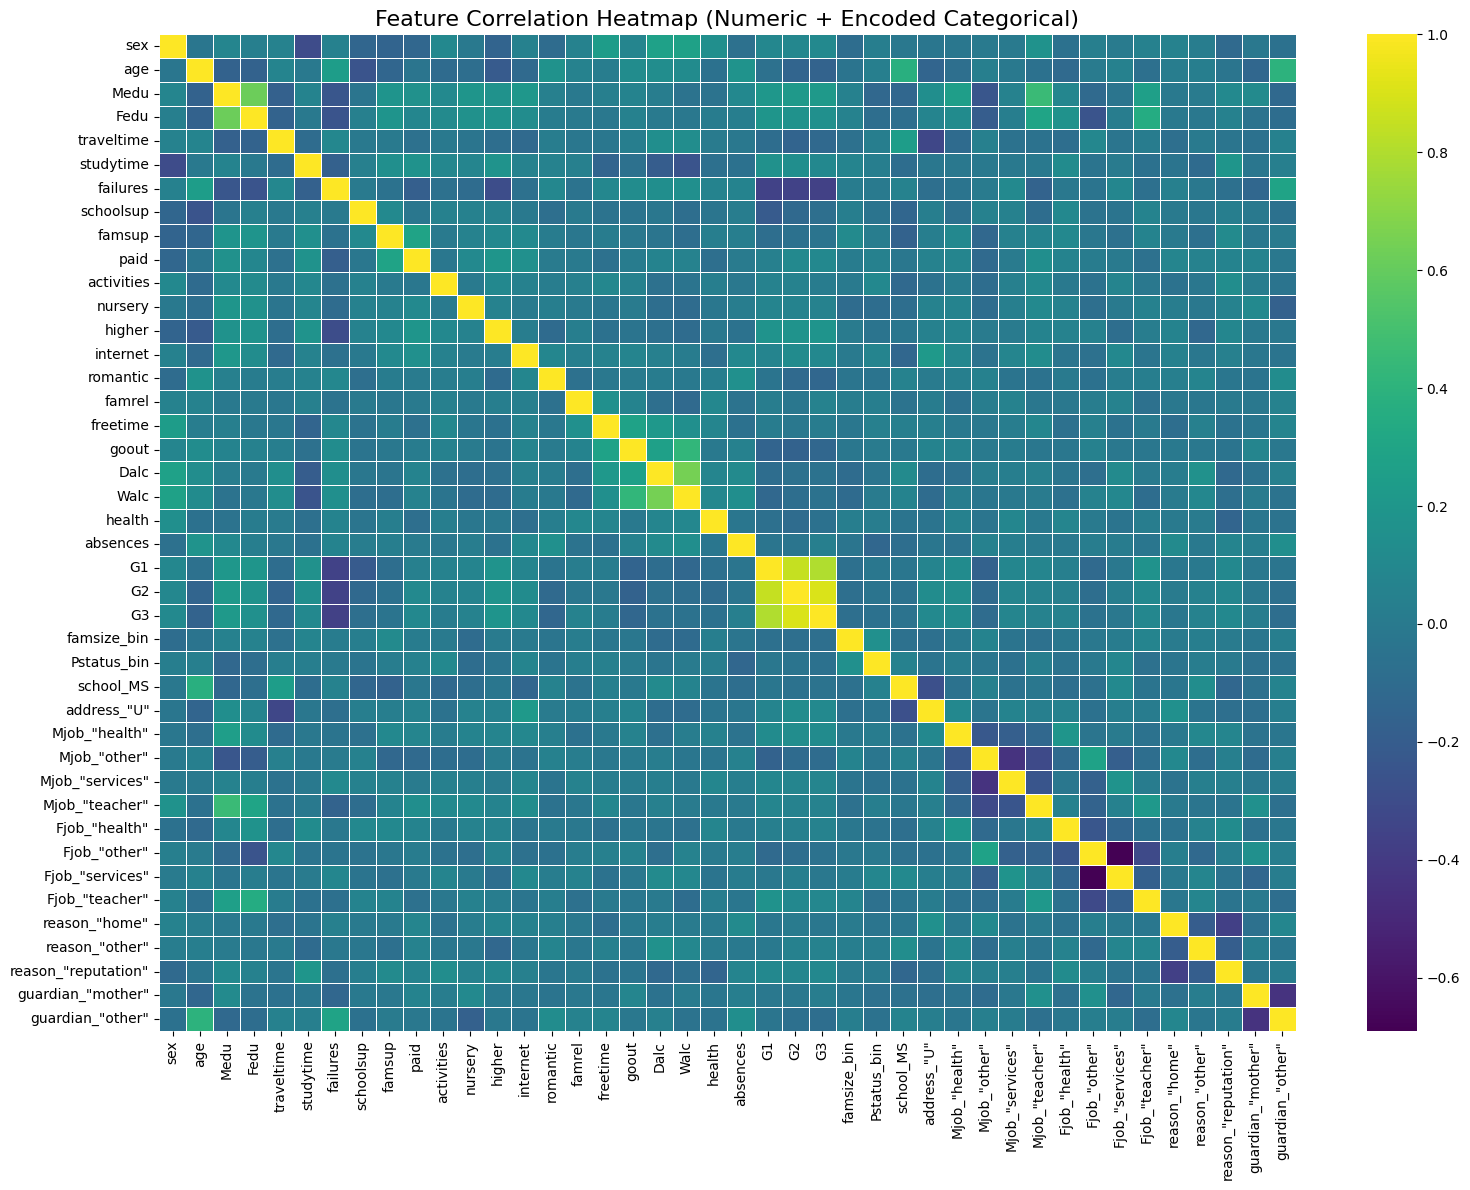

/tmp/ipython-input-585878739.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=g3_corr.values, y=g3_corr.index, palette="plasma")


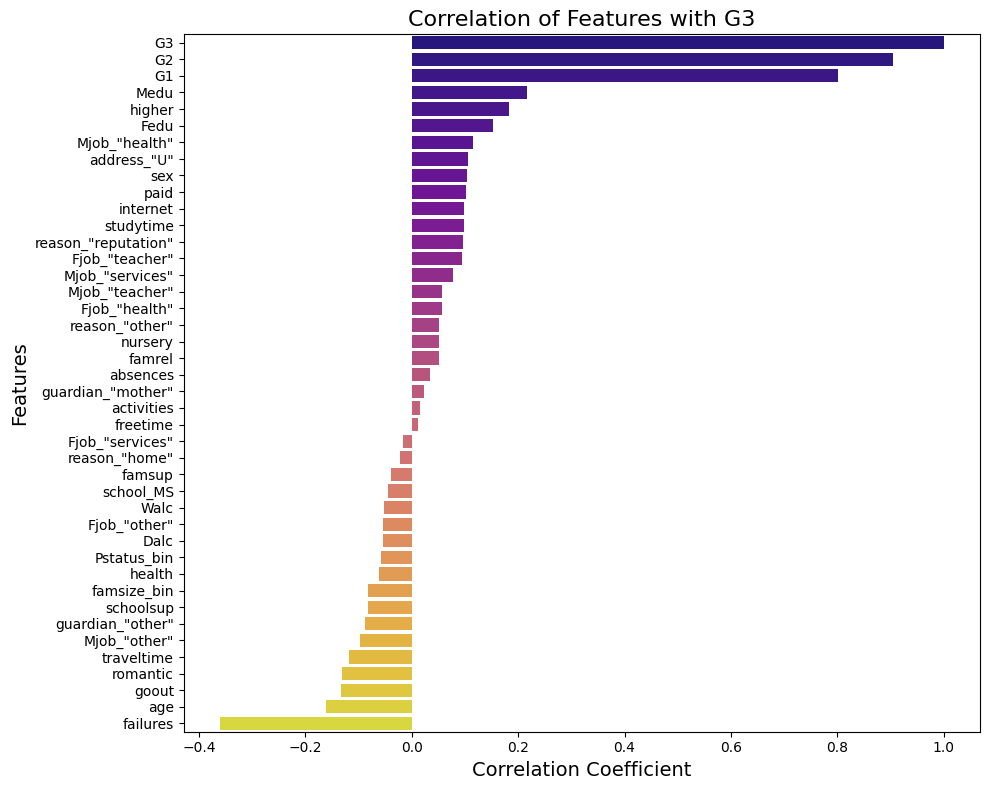

In [12]:
import seaborn as sns

#Compute full correlation matrix
corr_matrix = mat_data_encoded.corr()

#Plot heatmap of full correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, cmap="viridis", annot=False, linewidths=0.5)
plt.title("Feature Correlation Heatmap (Numeric + Encoded Categorical)", fontsize=16)
plt.tight_layout()
plt.show()

#Correlation of each feature with G3
g3_corr = corr_matrix['G3'].sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=g3_corr.values, y=g3_corr.index, palette="plasma")
plt.title("Correlation of Features with G3", fontsize=16)
plt.xlabel("Correlation Coefficient", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.tight_layout()
plt.show()

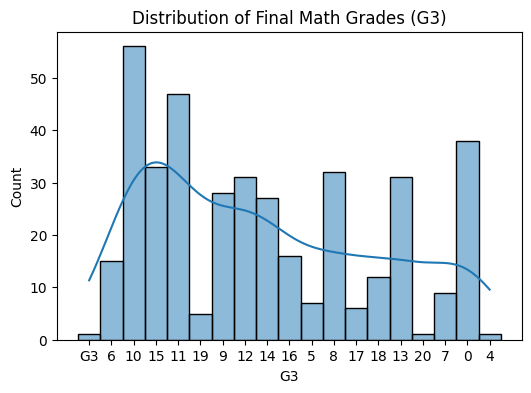

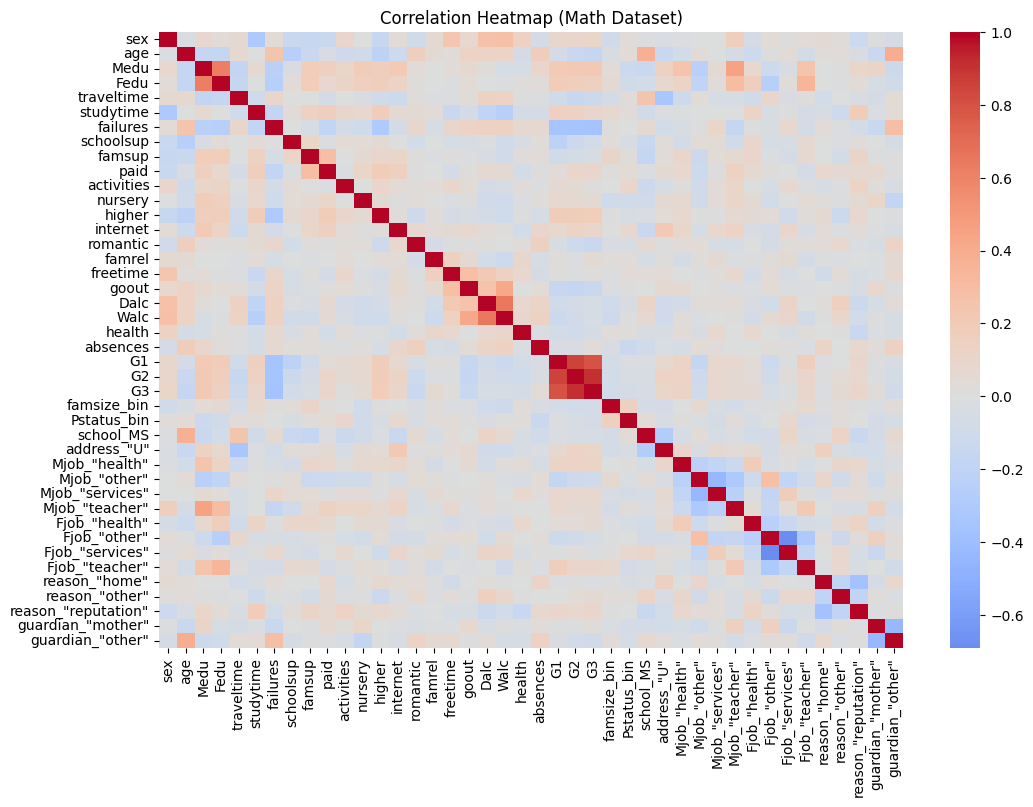

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of final grade (G3)
plt.figure(figsize=(6,4))
sns.histplot(mat["G3"], bins=20, kde=True)
plt.title("Distribution of Final Math Grades (G3)")
plt.show()

# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(mat_data_encoded.corr(), cmap="coolwarm", center=0)
plt.title("Correlation Heatmap (Math Dataset)")
plt.show()

### Feature Selection

In [19]:
print(mat_data_encoded.shape)

(395, 42)


Here, I am using a Open loop method.

In [20]:
from sklearn.feature_selection import SelectKBest, f_regression

# X = all features except target
X = mat_data_encoded.drop('G3', axis=1)
y = mat_data['G3']

# Apply SelectKBest
selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X, y)

# Create DataFrame of features and scores
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector.scores_
}).sort_values(by='Score', ascending=False)

print(feature_scores.head(20))  # sanity check

                Feature        Score
23                   G2  1775.707546
22                   G1   705.842247
6              failures    58.671666
2                  Medu    19.448184
12               higher    13.534903
1                   age    10.535470
3                  Fedu     9.351913
17                goout     7.054389
14             romantic     6.752698
4            traveltime     5.467880
28        Mjob_"health"     5.375147
27          address_"U"     4.445164
0                   sex     4.251814
9                  paid     4.131451
13             internet     3.849029
5             studytime     3.796826
29         Mjob_"other"     3.692366
38  reason_"reputation"     3.631960
35       Fjob_"teacher"     3.607623
40     guardian_"other"     3.051319


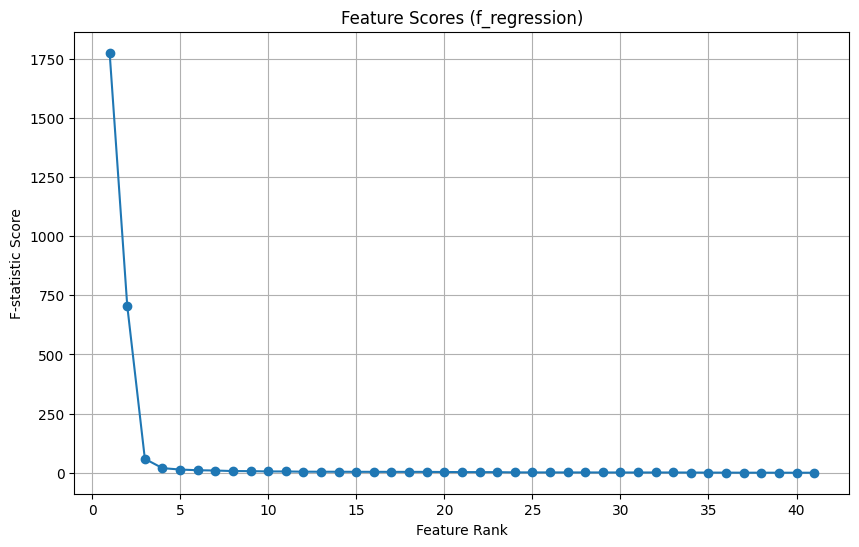

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(range(1, len(feature_scores)+1), feature_scores['Score'].values, marker='o')
plt.title('Feature Scores (f_regression)')
plt.xlabel('Feature Rank')
plt.ylabel('F-statistic Score')
plt.grid(True)
plt.show()

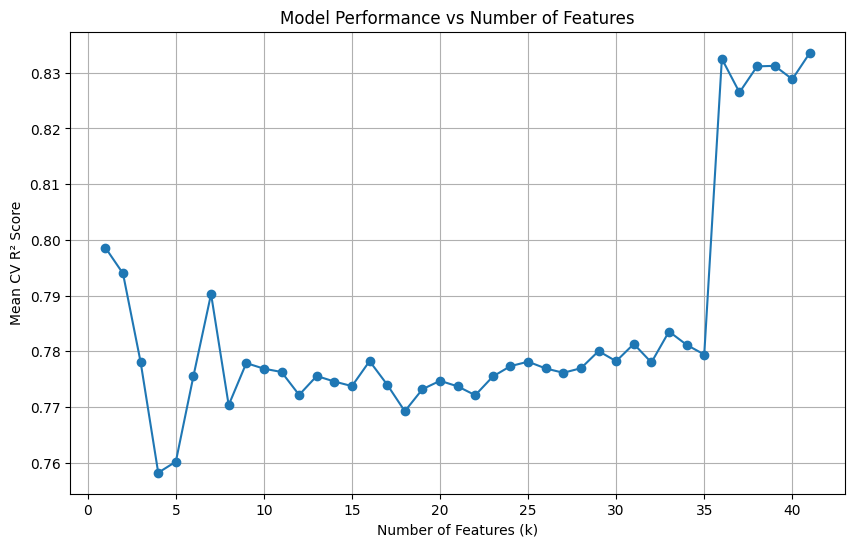

Optimal number of features: 41


In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np

scores_per_k = []
k_values = range(1, len(feature_scores)+1)

for k in k_values:
    selector = SelectKBest(score_func=f_regression, k=k)
    X_new = selector.fit_transform(X, y)
    model = RandomForestRegressor(random_state=42)
    cv_scores = cross_val_score(model, X_new, y, cv=5, scoring='r2')
    scores_per_k.append(np.mean(cv_scores))

# Plot CV scores vs k
plt.figure(figsize=(10,6))
plt.plot(k_values, scores_per_k, marker='o')
plt.title('Model Performance vs Number of Features')
plt.xlabel('Number of Features (k)')
plt.ylabel('Mean CV R² Score')
plt.grid(True)
plt.show()

# Best k
best_k = k_values[np.argmax(scores_per_k)]
print(f"Optimal number of features: {best_k}")

I will choose firt 16.

## Modeling

## Model Improvements

###Ensemble Learning

In [ ]:
import pandas as pd

# Load both datasets
d1 = pd.read_csv("/content/student-mat.csv", sep=";")
d2 = pd.read_csv("/content/student-por.csv", sep=";")

# Keys for merging (same as in the R code)
merge_keys = ["school","sex","age","address","famsize","Pstatus",
              "Medu","Fedu","Mjob","Fjob","reason","nursery","internet"]

# Merge on those keys, add suffixes to distinguish subjects
d3 = pd.merge(d1, d2, on=merge_keys, suffixes=("_math", "_por"))

print("Number of merged students:", len(d3))  # should be 382

# Save to CSV
d3.to_csv("student-mat-por-merged.csv", index=False, sep=";")
print("Merged CSV saved as 'student-mat-por-merged.csv'")

Number of merged students: 382
Merged CSV saved as 'student-mat-por-merged.csv'
